## Import

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

from scipy.spatial.distance import cdist 

## POCS-based Clustering Functions

In [6]:
def initialize_centroids(X, num_clusters):
    
    n_row, n_col = X.shape

    # randomly choose the first centroid
    centroids  = np.zeros((num_clusters, n_col))
    rand_index = np.random.choice(len(X))
    centroids[0] = X[rand_index]

    # compute distances from the first centroid chosen to all the other data points
    distances = pairwise_distances(X, [centroids[0]], metric = 'euclidean').flatten()

    k = num_clusters

    for i in range(1, k):
        # choose the next centroid, the probability for each data point to be chosen
        # is directly proportional to its squared distance from the nearest centroid
        prob = distances ** 2
        rand_index = np.random.choice(n_row, size = 1, p = prob / np.sum(prob))
        centroids[i] = X[rand_index]

        if i == k - 1:
            break

        # if we still need another cluster,
        # compute distances from the centroids to all data points
        # and update the squared distance as the minimum distance to all centroid
        distances_new = pairwise_distances(X, [centroids[i]], metric = 'euclidean').flatten()
        distances = np.min(np.vstack((distances, distances_new)), axis = 0)
        
    return centroids


def pocs_clustering_2d(X, num_clusters, n_iterations):
    
    # Generate prototypes   
    centroids_init = initialize_centroids(X, num_clusters)
    
    # Finding the distance between centroids and all the data points
    distances = cdist(X, centroids_init ,'euclidean') # Step 2

    # Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) # Step 3
    saved_points = points.copy()

    for ite in range(n_iterations):

        updated_prototypes = []

        for idx in range(num_clusters):

            cluster_idx_points = X[points==idx]    # get data points of a cluster

            dists = cdist([centroids_init[idx]], cluster_idx_points ,'euclidean')

            sum_dist = np.sum(dists)
            importances = dists/sum_dist
            importances = np.transpose(importances)

            pre_centroid = centroids_init[idx].copy()  
            updated_centroid = centroids_init[idx].copy()

            moment = importances*(cluster_idx_points - pre_centroid)
            delta = np.sum(moment, axis=0)
            
            updated_centroid += delta
            updated_prototypes.append(updated_centroid)

        centroids_init = np.array(updated_prototypes)

        # Finding the distance between centroids and all the data points
        distances = cdist(X, centroids_init ,'euclidean') # Step 2

        # Centroid with the minimum Distance
        points = np.array([np.argmin(i) for i in distances]) # Step 3

        difference = np.sum(saved_points-points)

        if difference == 0:
            print(f'Converged after {ite} iterations!')
            break

        else:
            saved_points = points.copy()
            
    return centroids_init, points

## Generate Data & Test

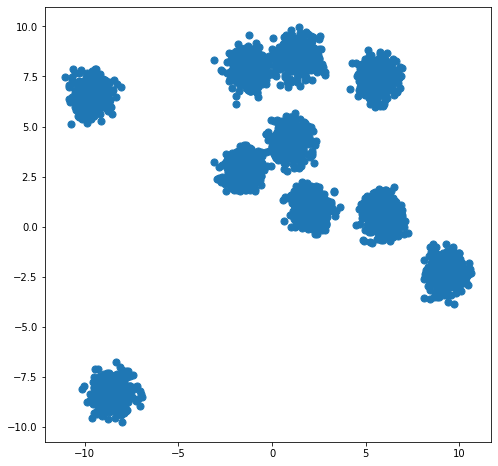

In [18]:
num_clusters = 10

X, y = make_blobs(n_samples=5000, centers=num_clusters, cluster_std=0.5, random_state=0)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

Converged after 3 iterations!
0.048841238021850586


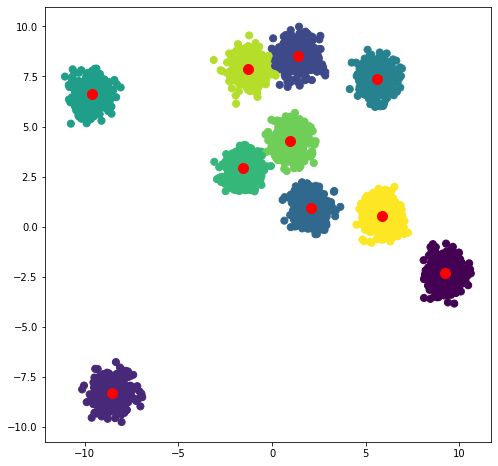

In [19]:
# POSC-based Clustering Algorithm Demo

# num_clusters = 6

start_time = time.time()
centroids, labels = pocs_clustering_2d(X, num_clusters, 100)
end_time = time.time()
proc_time = end_time - start_time
print(proc_time)

# Track results
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red')
plt.show()